Many materials display time-dependent behavior under stress, which can be simulated through a variety of models, including the Kelvin model. The Kelvin model simulates materials as a spring and a dashpot in parallel, where the spring obeys Hooke's Law, $\sigma=M\epsilon $ and the dashpot obeys $\sigma = \eta \frac{d \epsilon}{dt}$. 

In the above equations, $\sigma$ is the stress, $M$ is the modulus of elasticity in the linear regime, $\epsilon$ is the elastic strain, and $\eta$ is related to the viscous response.

We can use a first order differential equation to find the graph of strain vs. time when stress is the forcing function:
$$\sigma(t) = \sigma_0 \sin(\omega t)$$


In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sympy as sp
sp.init_session(quiet = True)

We begin by import `sympy` to do the differential equation and `numpy` and `matplotlib` for the graphing. First we must set out variables. $\epsilon$ and $\sigma$ are defined as functions, $t$ is defined as a real value, and all other variables are defined as real and postive.

In [46]:
sp.var('omega, M, eta, epsilon0, sigma0', real=True, positive=True)
sp.var('t', real = True)
sp.var('epsilon, sigma', cls = Function)

(epsilon, sigma)

Next we must define our inital function, then subsitute our forcing function for stress, then we use the `sympy` function `dsolve` to solve the equation for $\epsilon(t)$, which finds it equal to an equation which includes an unknown constant.

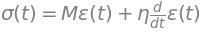

In [33]:
kelvinModel = Eq(sigma(t),M*epsilon(t)+eta*epsilon(t).diff(t))
kelvinModel

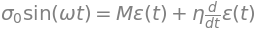

In [34]:
kelvinModelVaryingStress = kelvinModel.subs(sigma(t),sigma0*sp.sin(omega*t))
kelvinModelVaryingStress

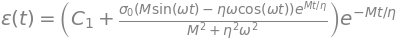

In [35]:

kelvinModelSolution = dsolve(kelvinModelVaryingStress,epsilon(t))
kelvinModelSolution

When $t$ is 0, $\epsilon(t)$ is 0. We can use this to solve for the constant, which we then subsitute back in.

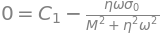

In [47]:
equationToSolveForC = kelvinModelSolution.subs([(epsilon(t),0),(t,0)])
equationToSolveForC.doit()

In [48]:
var('C1')

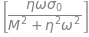

In [49]:
solve(equationToSolveForC.rhs,C1)

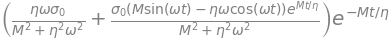

In [50]:
modeled = kelvinModelSolution.subs(C1,((omega*eta*sigma0)/(M**2 +eta**2*omega**2))).collect(sigma0,)
modeled.rhs


Now we use the `sympy` function `lambdify` to make the function compatible with `numpy` (note that every variable in the function is listed, and only the right hand side of the function is modeled). Next, a `linspace` is created going from 0 to 10, with 10000 points in between.  This array is used as the list of t-values for the  graph. 

Also note the `%matplotlib inline` at the top, which is used to make the graph show up in the notebook and not a separate window.

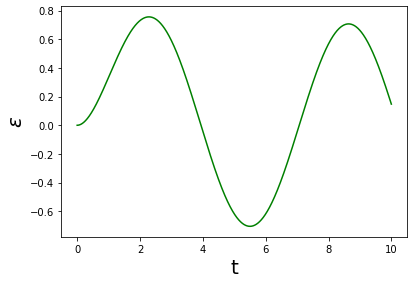

In [53]:
%matplotlib inline

numModeled = sp.lambdify((M,omega, eta, sigma0,t),modeled.rhs, 'numpy')
#print(numModeled)

tValues = np.arange(0,1.1,0.1)
tValLin = np.linspace(0,10,10000)
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) #left,bottom, width, height, range 0-1

axes.plot(tValLin, numModeled(1,1,1,1,tValLin),color = 'g')
axes.set_xlabel('t', size = 20)
axes.set_ylabel('$\epsilon$', size = 20)

plt.show()


Here are some potential ways to extend or improve this program:

* Show a graph of the forcing function as well
* Allow user to create their own forcing functions or set $\omega$ and $M$ and other variables
* Make the graph look better (clear delivery of information is very important!)